# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("Dataset .csv")

# Data Cleaning

In [3]:
# Drop irrelevant columns
drop_cols = ["Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose", 
             "Rating color", "Rating text", "Currency", "Switch to order menu"]
df_cleaned = df.drop(columns=drop_cols)

In [4]:
# Handle missing values
df_cleaned.dropna(inplace=True)

# Data Analysis

In [5]:
# Analyze relationship between cuisine and ratings
df_cuisine_ratings = df_cleaned[['Cuisines', 'Aggregate rating']]
df_cuisine_ratings = df_cuisine_ratings.groupby('Cuisines').mean().reset_index()
df_cuisine_ratings = df_cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

In [6]:
# Identify most popular cuisines based on number of votes
df_cuisine_votes = df_cleaned[['Cuisines', 'Votes']]
df_cuisine_votes = df_cuisine_votes.groupby('Cuisines').sum().reset_index()
df_cuisine_votes = df_cuisine_votes.sort_values(by='Votes', ascending=False)

# Data Visulization

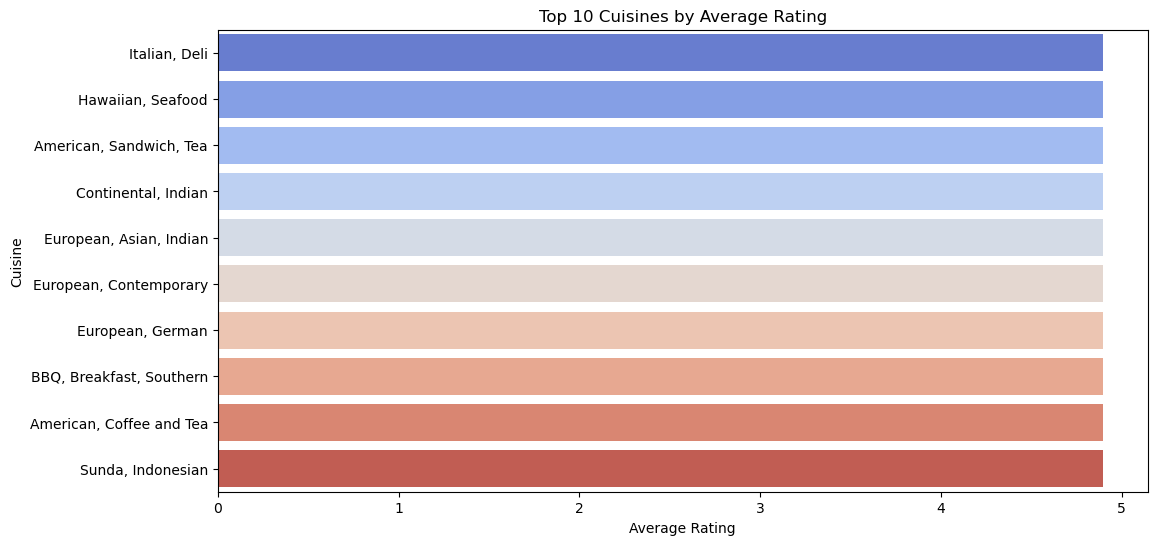

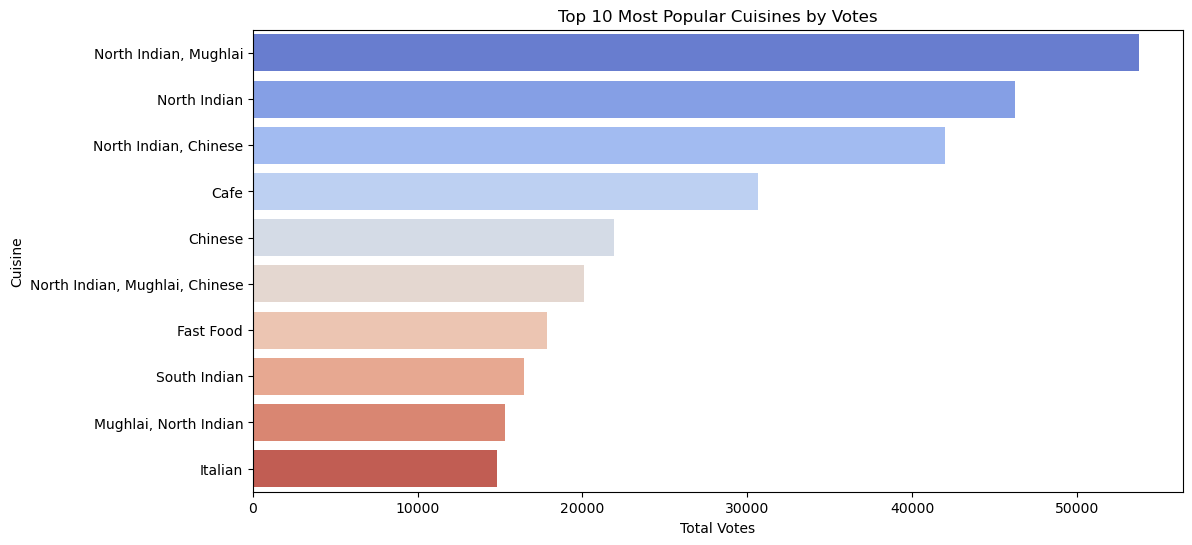

In [7]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(y=df_cuisine_ratings['Cuisines'][:10], x=df_cuisine_ratings['Aggregate rating'][:10], palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines by Average Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(y=df_cuisine_votes['Cuisines'][:10], x=df_cuisine_votes['Votes'][:10], palette='coolwarm')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.show()

In [8]:
# Insights
highest_rated_cuisine = df_cuisine_ratings.iloc[0]
most_popular_cuisine = df_cuisine_votes.iloc[0]
print(f"Highest Rated Cuisine: {highest_rated_cuisine['Cuisines']} with Rating {highest_rated_cuisine['Aggregate rating']:.2f}")
print(f"Most Popular Cuisine by Votes: {most_popular_cuisine['Cuisines']} with {most_popular_cuisine['Votes']} votes")

Highest Rated Cuisine: Italian, Deli with Rating 4.90
Most Popular Cuisine by Votes: North Indian, Mughlai with 53747 votes
